# Atividade 1.2 - Regressão Linear

## Nome: Alessandro Souza Silva, mat: 399941

## Questão 01

#### Implementação dos métodos de regressão

Todos os métodos implementados estão salvos no módulo RegressaoLinear!

In [1]:
from RegressaoLinear import *

## Questão 02

#### Implementação das métricas

Todas as métricas implemenadas estão salvas no módulo Metricas!

In [2]:
from Metricas import *

## Questões 03, 04 e 05

#### Leitura do conjunto de dados Boston House Price Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_fwf("data/housing.data")
data.head()

,CRIM,ZN,INDUS,C,NOX,RM,AGE,DIS,RA,TAX,PTRA,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Embaralhando o conjunto de dados

In [5]:
data = data.sample( frac=1, random_state=40 )
data.head()

,CRIM,ZN,INDUS,C,NOX,RM,AGE,DIS,RA,TAX,PTRA,B,LSTAT,MEDV
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,4,666.0,20.2,395.43,11.48,22.7
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61,30.3
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233.0,17.9,396.90,30.81,14.4
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,4,666.0,20.2,0.32,17.44,13.4
469,3.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,4,666.0,20.2,396.90,14.76,20.1


#### Capturando o atributo LSTAT como preditor e o atributo MEDV como alvo

In [6]:
x = data.loc[:,['LSTAT']].values
y = data['MEDV'].values.reshape(-1,1)

#### Separando os dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [8]:
print('Treino shape : ',x_train.shape)
print('Teste shape : ',x_test.shape)

Treino shape :  (404, 1)
Teste shape :  (102, 1)


## Questão 06

#### Regressão Linear Univariada com Método Analítico 

In [9]:
regA = RegLinearUnivariadaMA()

In [10]:
regA.fit( x=x_train, y=y_train )

In [11]:
y_pred_train = regA.predict( x=x_train )
y_pred_test = regA.predict( x=x_test )

In [12]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 35.37430617110251
R2: 0.5360524503033299


In [13]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 51.90140276254093
R2: 0.5348957403921226


In [14]:
print('Coeficientes!!!')
print('W0: ',regA.weight0)
print('W1: ',regA.weight1)

Coeficientes!!!
W0:  33.59263054628933
W1:  -0.8920455980169228


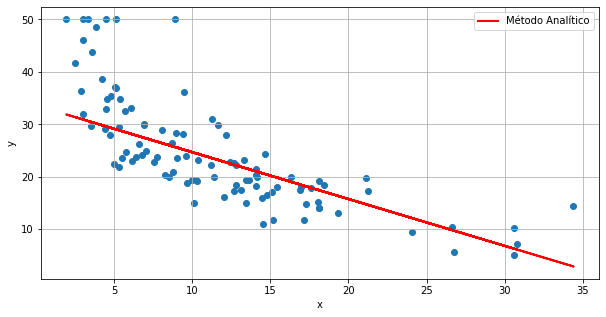

In [15]:
plt.figure(figsize=(10, 5))

plt.scatter(x_test, y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x_test, y_pred_test, c='r', label='Método Analítico', linewidth=2)
plt.legend()
plt.show()

#### Regressão Linear Univariada com Gradiente Descendente

In [16]:
regB = RegLinearUnivariadaGD()

In [17]:
regB.fit( x=x_train, y=y_train, alpha=0.0001, ephocs=1000 )

In [18]:
y_pred_train = regB.predict( x=x_train )
y_pred_test = regB.predict( x=x_test )

In [19]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 300.12432922223894
R2: -2.93624532092624


In [20]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 441.71000064228315
R2: -2.9582976928399756


In [21]:
print('Coeficientes!!!')
print('W0: ',regB.weight0)
print('W1: ',regB.weight1)

Coeficientes!!!
W0:  0.05755428909638653
W1:  0.9965975798231057


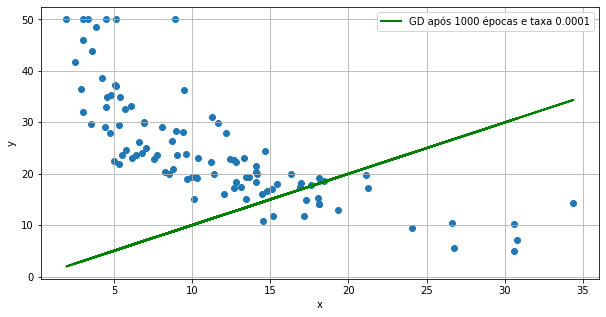

In [22]:
plt.figure(figsize=(10, 5))

plt.scatter(x_test, y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x_test, y_pred_test, c='g', label='GD após 1000 épocas e taxa 0.0001', linewidth=2)
plt.legend()
plt.show()

#### Regressão Quadrática

In [23]:
regF = RegLinearQuadratica()

In [24]:
regF.fit( x=x_train, y=y_train )

In [25]:
y_pred_train = regF.predict( x=x_train )
y_pred_test = regF.predict( x=x_test )

In [26]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 28.190964763941444
R2: 0.6302647191847901


In [27]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 39.537840484020684
R2: 0.6456893832147645


In [28]:
print('Coeficientes!!!')
print('W0: ',regF.weigths[0])
print('W1: ',regF.weigths[1])
print('W2: ',regF.weigths[2])

Coeficientes!!!
W0:  [41.69411126]
W1:  [-2.2136614]
W2:  [0.04117397]


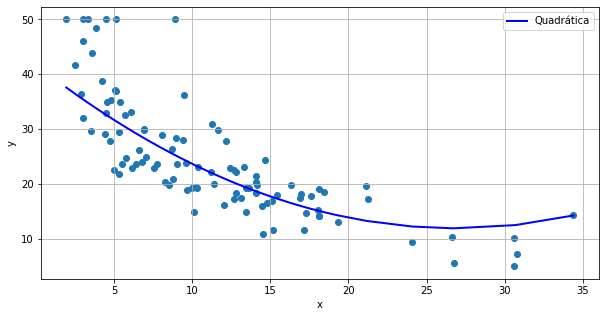

In [29]:
aux = pd.DataFrame( data = np.concatenate([x_test,y_test], axis=1)).sort_values(by=[0])
x_test_ord = aux.iloc[:,[0]].values
y_test_ord = aux.iloc[:,[1]].values

y_pred_ord = regF.predict(x=x_test_ord)

plt.figure(figsize=(10, 5))

plt.scatter(x_test_ord, y_test_ord)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x_test_ord, y_pred_ord, c='b', label='Quadrática', linewidth=2)
plt.legend()
plt.show()

#### Regressão Cúbica

In [30]:
regG = RegLinearCubica()

In [31]:
regG.fit( x=x_train, y=y_train )

In [32]:
y_pred_train = regG.predict( x=x_train )
y_pred_test = regG.predict( x=x_test )

In [33]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 26.916703461940653
R2: 0.6469771433345959


In [34]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 37.1873365522604
R2: 0.6667529640179369


In [35]:
print('Coeficientes!!!')
print('W0: ',regG.weigths[0])
print('W1: ',regG.weigths[1])
print('W2: ',regG.weigths[2])

Coeficientes!!!
W0:  [47.38005941]
W1:  [-3.67281755]
W2:  [0.13914879]


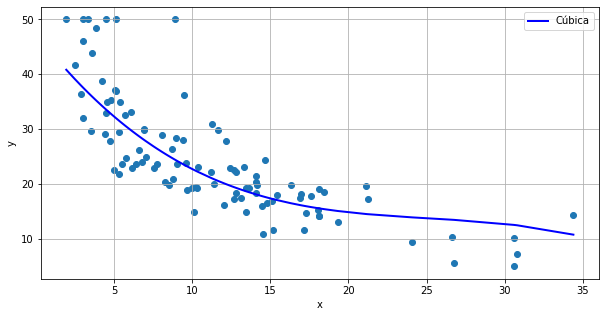

In [36]:
aux = pd.DataFrame( data = np.concatenate([x_test,y_test], axis=1)).sort_values(by=[0])
x_test_ord = aux.iloc[:,[0]].values
y_test_ord = aux.iloc[:,[1]].values

y_pred_ord = regG.predict(x=x_test_ord)

plt.figure(figsize=(10, 5))

plt.scatter(x_test_ord, y_test_ord)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x_test_ord, y_pred_ord, c='b', label='Cúbica', linewidth=2)
plt.legend()
plt.show()

A regressão cúbica obteve resultados melhores!!! O motivo é que o polinômio de grau 3 aprendido por essa regressão condiz melhor com a distribuição dos nossos dados de teste no plano.

## Questão 07

#### Leitura do segundo conjunto de dados!!!

In [37]:
data2 = pd.read_csv('./data/trab1_data.txt', sep=" ", header=None)

In [38]:
data2.head()

,0,1,2,3,4,5
0,2.104,3,1.214590,1.645454,2.040360,3.999
1,1.600,3,0.804845,1.156956,1.043933,3.299
2,2.400,3,1.526176,1.990969,2.735965,3.690
3,1.416,2,1.017324,1.048135,0.873698,2.320
4,3.000,4,1.352385,2.118710,2.403007,5.399


#### Separando os dados em treino e teste

In [39]:
x = data2.iloc[:,:-1].values
y = data2.iloc[:,-1].values.reshape(-1,1)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [41]:
print('Treino shape : ',x_train.shape)
print('Teste shape : ',x_test.shape)

Treino shape :  (37, 5)
Teste shape :  (10, 5)


## Questão 08

#### Regressão Linear Multivariada com Método Analítico

In [42]:
regC = RegLinearMultivariadaMA()

In [43]:
regC.fit( x=x_train, y=y_train )

In [44]:
y_pred_train = regC.predict( x=x_train )
y_pred_test = regC.predict( x=x_test )

In [45]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 0.4122361403175551
R2: 0.7293400627471571


In [46]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 0.3326698183711289
R2: 0.7628238087797834


In [47]:
print('Coeficientes!!!')
for w in range(len(regC.weigts)):
    print('W',w,' : ',regC.weigts[w])

Coeficientes!!!
W 0  :  [1.32076939]
W 1  :  [1.79492744]
W 2  :  [-0.16621463]
W 3  :  [-0.92091273]
W 4  :  [-0.05693023]
W 5  :  [0.07022502]


#### Regressão Linear Multivariada com Gradiente Descendente

In [82]:
regD = RegLinearMultivariadaGD()

In [83]:
regD.fit( x=x_train, y=y_train, alpha=0.0001, ephocs=1000 )

In [84]:
y_pred_train = regD.predict( x=x_train)
y_pred_test = regD.predict( x=x_test )

In [85]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 0.9303933833152779
R2: 0.38913600696292605


In [86]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 0.8266928058378384
R2: 0.4106112422286734


In [87]:
print('Coeficientes!!!')
for w in range(len(regD.weights)):
    print('W',w,' : ',regD.weights[w])

Coeficientes!!!
W 0  :  [0.14003053]
W 1  :  [0.31802056]
W 2  :  [0.43787231]
W 3  :  [0.16982116]
W 4  :  [0.19545061]
W 5  :  [0.23588664]


#### Regressão Linear Multivariada com Gradiente Descendente Estocástico

In [54]:
regE = RegLinearMultivariadaSGD()

In [55]:
regE.fit( x=x_train, y=y_train, alpha=0.0001, ephocs=1000 )

In [56]:
y_pred_train = regE.predict( x=x_train )
y_pred_test = regE.predict( x=x_test )

In [57]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 1.1272816052442667
R2: 0.2598660362318942


In [58]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 0.8797938521069806
R2: 0.3727529719305446


In [59]:
print('Coeficientes!!!')
for w in range(len(regE.weights)):
    print('W',w,' : ',regE.weights[w])

Coeficientes!!!
W 0  :  [0.73611048]
W 1  :  [0.00739009]
W 2  :  [0.63642066]
W 3  :  [0.26260133]
W 4  :  [0.05593372]
W 5  :  [0.06817817]


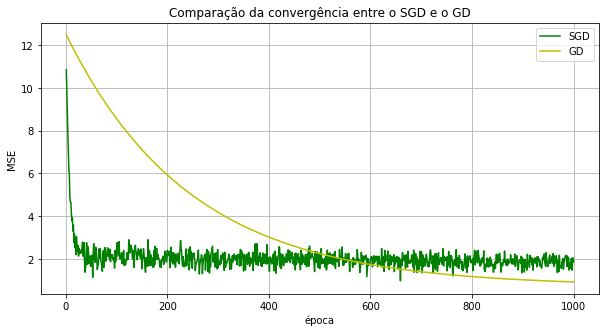

In [60]:
plt.figure(figsize=(10, 5))
plt.plot( range(1,1001), regE.history, label='SGD', c='g')
plt.plot( range(1,1001), regD.history, label='GD', c='y')
plt.grid()
plt.xlabel('época')
plt.ylabel('MSE')

plt.title("Comparação da convergência entre o SGD e o GD")

plt.legend()

plt.show()

O método com SGD acabou convergindo mais rápido do que o método com GD (precisou de menos épocas para chegar a um MSE menor do que 2 se comparado com o outro método).

#### Regressão Linear Regularizada Multivariada com Gradiente Descendente

In [61]:
regH = RegLinearRegularizadoMultivariadaGD()

In [62]:
regH.fit( x=x_train, y=y_train, alpha=0.01, ephocs=1000, lambd=1)

In [63]:
y_pred_train = regH.predict( x=x_train)
y_pred_test = regH.predict( x=x_test )

In [64]:
print('Conjunto de Treino!!!')
print( 'MSE:', MSE( y_true=y_train, y_predict=y_pred_train ) )
print( 'R2:', R2( y_true=y_train, y_predict=y_pred_train ) )

Conjunto de Treino!!!
MSE: 0.45397549011704985
R2: 0.701935454822672


In [65]:
print('Conjunto de Teste!!!')
print( 'MSE:', MSE( y_true=y_test, y_predict=y_pred_test ) )
print( 'R2:', R2( y_true=y_test, y_predict=y_pred_test ) )

Conjunto de Teste!!!
MSE: 0.41292217720860896
R2: 0.7056080718707105


In [66]:
print('Coeficientes!!!')
for w in range(len(regH.weights)):
    print('W',w,':',regH.weights[w])

Coeficientes!!!
W 0 : [0.34838125]
W 1 : [1.01019281]
W 2 : [0.04407033]
W 3 : [0.40549868]
W 4 : [0.00951631]
W 5 : [0.2680611]


In [67]:
MSEs_train = []
MSEs_test = []

for lambd in range(1,10):
    
    regH.fit( x=x_train, y=y_train, alpha=0.01, ephocs=1000, lambd=lambd)
    
    y_pred_train = regH.predict( x=x_train )
    MSEs_train.append( MSE(y_true=y_train, y_predict=y_pred_train) )
    
    y_pred_test = regH.predict( x=x_test )
    MSEs_test.append( MSE(y_true=y_test, y_predict=y_pred_test) )

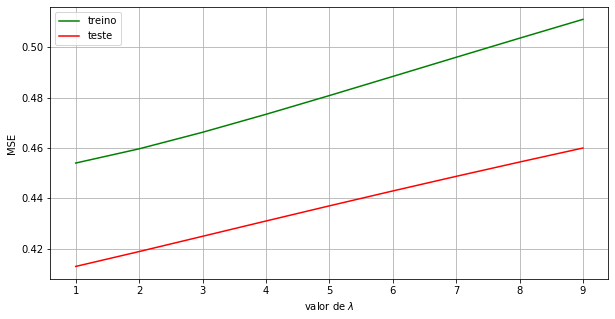

In [68]:
plt.figure(figsize=(10, 5))
plt.plot( range(1,10), MSEs_train, label='treino', c='g')
plt.plot( range(1,10), MSEs_test, label='teste', c='r' )
plt.grid()
plt.xlabel('valor de $\lambda$')
plt.ylabel('MSE')

plt.legend()

plt.show()

O valor de $\lambda$ mais adequado seria 1. Quanto maior o valor de $\lambda$ maior o MSE nesse caso. Também é interessante comentar que a regularização melhorou o desempenho do modelo no conjunto de teste, lidando melhor com o overfitting, ou seja, a regularização cumpriu bem seu objetivo.

In [89]:
np.sum(data2.iloc[:,1]*data2.iloc[:,1])

499

In [79]:
data2[:]

In [80]:
a

array([3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 4, 3, 3, 5, 3, 4, 2, 3, 4, 4, 3, 2,
       3, 4, 3, 3, 3, 3, 3, 3, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 2, 3, 4, 3,
       2, 4, 3])

In [81]:
a[i]

NameError: name 'i' is not defined